Lung_cancer: Logistic regression
---
---

<a id='imporp'></a>
## Importing Packages
---

In [2]:
## Basic packages
import numpy as np
import pandas as pd


## Graphing packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Scikit learn and Statsmodel packages
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
## Operating system dependent functionality
import os
import statsmodels.api as st 
#from pandas.stats.api import ols
## Lines of code needed to make sure graph(s) appear in notebook, and check versions of packages
%matplotlib inline
#%load_ext watermark
#%config InlineBackend.figure_format = 'retina'
#%watermark -v -d -a 'Delta Analytics' -p scikit-learn,matplotlib,numpy,pandas

<a id='rds'></a>
## Reading the dataset
---
we are using Lung_Cancer dataset

In [3]:
LUNG_CANCER_filepath = os.path.join('cancer_patient.csv')
LUNG_CANCER = pd.read_csv(LUNG_CANCER_filepath)
LUNG_CANCER.head(3)

,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P107,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High


In [44]:
LUNG_CANCER.tail(3)

,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
999,P999,47,1,6,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


<a id='msvl'></a>
### Missing Values
---
1. we will drop the missing values if there is one

In [45]:
LUNG_CANCER.isnull().sum()

patient_id                  0
age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     0
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64

In [5]:
LUNG_CANCER.dropna(inplace=True)

In [6]:
LUNG_CANCER.isnull().sum()

patient_id                  0
age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     0
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64

<a id='implementation'></a>
## Implementation of Logistic Regression
---


<a id='LEVEL'></a>
### Level: Low, Medium, High
---

In [7]:
## Describe our dataset
LUNG_CANCER.describe()

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [8]:
LUNG_CANCER.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
patient_id                  1000 non-null object
age                         1000 non-null int64
gender                      1000 non-null int64
air_pollution               1000 non-null int64
alcohol_use                 1000 non-null int64
dust_allergy                1000 non-null int64
occupational_hazards        1000 non-null int64
genetic_risk                1000 non-null int64
chronic_lung_disease        1000 non-null int64
balanced_diet               1000 non-null int64
obesity                     1000 non-null int64
smoking                     1000 non-null int64
passive_smoker              1000 non-null int64
chest_pain                  1000 non-null int64
coughing_of_blood           1000 non-null int64
fatigue                     1000 non-null int64
weight_loss                 1000 non-null int64
shortness_of_breath         1000 non-null int64
wheezing                    1

### here we have a categorical Column in our dataset which is Level

In [9]:
def data_cleaning(data):
    LUNG_CANCER["age"]=data["age"].fillna(LUNG_CANCER["age"].median())
    
    
    LUNG_CANCER.loc[data["level"]=="Low","level"]=1
    LUNG_CANCER.loc[data["level"]=="Medium","level"]=2
    LUNG_CANCER.loc[data["level"]=="High","level"]=3
    
    return data

LUNG_CANCER=data_cleaning(LUNG_CANCER)
LUNG_CANCER.head(4)

,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P107,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
3,P189,39,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [10]:
## now lets add the intercept

LUNG_CANCER['intercept'] = 1.0

## we have a dataset that is ready for analysis
LUNG_CANCER.head(4)

,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level,intercept
0,P1,33,1,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,1,1.0
1,P10,17,1,3,1,5,3,4,2,2,...,3,7,8,6,2,1,7,2,2,1.0
2,P107,44,1,6,7,7,7,7,6,7,...,3,2,7,8,2,4,5,3,3,1.0
3,P189,39,2,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,3,1.0


In [11]:
'''Define y and X'''
y = LUNG_CANCER['level'] 
columns_ = LUNG_CANCER.columns.tolist()
exclude_col = ['level','patient_id','alcohol_use','dust_allergy','occupational_hazards','balanced_diet','obesity','snoring','frequent_cold']
X = LUNG_CANCER[[i for i in columns_ if i not in exclude_col]]
X = st.add_constant(X, prepend = False) 
print (X.shape, y.shape)

'''Split the data'''
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1000, 17) (1000,)
(700, 17) (700,)
(300, 17) (300,)


C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
LUNG_CANCER.columns

Index(['patient_id', 'age', 'gender', 'air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking',
       'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring', 'level', 'intercept'],
      dtype='object')

In [13]:
## Set up the regression

mul_lr = LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train,y_train)

## lets get the results
mul_lr.intercept_
mul_lr.coef_

array([[-3.17685199e-02,  1.47464418e-01,  1.91315555e-01,
        -1.07116609e+00,  3.29164839e-02,  6.86628736e-02,
        -1.37516216e+00,  7.06189546e-01, -1.28525724e+00,
        -1.53738658e+00,  1.03157677e-01, -3.54326295e-01,
        -9.39638735e-01, -7.18157437e-01, -1.24079736e+00,
        -4.89756753e-01,  2.93152389e-06],
       [ 3.66812895e-02, -2.78637530e-01, -5.08674811e-01,
         6.64688514e-01, -4.37367788e-01, -2.12402217e-01,
         1.47896467e-01, -7.19789255e-01,  2.09123966e-02,
         3.45001892e-01, -5.25706903e-01, -2.19421558e-01,
         7.03518991e-01,  1.15699818e-02,  6.00934480e-01,
         2.57988306e-02,  1.51172633e-08],
       [-4.91276964e-03,  1.31173112e-01,  3.17359256e-01,
         4.06477580e-01,  4.04451304e-01,  1.43739344e-01,
         1.22726570e+00,  1.35997095e-02,  1.26434485e+00,
         1.19238469e+00,  4.22549226e-01,  5.73747853e-01,
         2.36119744e-01,  7.06587455e-01,  6.39862879e-01,
         4.63957923e-01, -2.9

In [14]:
## Set up the regression

logit = sm.MNLogit(y_train, X_train)
logit_result = logit.fit(method='bfgs')

## lets get the results
print(logit_result.summary())

         Current function value: 0.097334
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                          MNLogit Regression Results                          
Dep. Variable:                  level   No. Observations:                  700
Model:                        MNLogit   Df Residuals:                      666
Method:                           MLE   Df Model:                           32
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:                  0.9112
Time:                        20:33:12   Log-Likelihood:                -68.134
converged:                      False   LL-Null:                       -767.63
                                        LLR p-value:                5.963e-274
                 level=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                         -0.1031      0.060  

C:\Users\Lina\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [15]:
print("Coeffieients")
print(logit_result.params)
print ("\n")
print("p-Values")
print(logit_result.pvalues)
print ("\n")
print("Dependent variables")
print(logit.endog_names)

Coeffieients
                                  0          1
age                       -0.103143  -1.015068
gender                   -10.978373 -12.576457
air_pollution             -2.691276   1.401134
genetic_risk               5.046776   4.560153
chronic_lung_disease      -2.784542   0.006603
smoking                   -0.936573  -3.549460
passive_smoker             1.478245  11.258127
chest_pain                -0.870475  -4.384082
coughing_of_blood          0.044676   1.324661
fatigue                    5.894866   7.592025
weight_loss               -1.633568  -1.472910
shortness_of_breath       -0.088386   3.015135
wheezing                   0.677735  -3.762030
swallowing_difficulty      0.556677   0.168725
clubbing_of_finger_nails   3.719845   0.681413
dry_cough                 -0.669196  -1.664935
intercept                 -5.111022 -10.590282


p-Values
                                 0         1
age                       0.083975  0.017339
gender                    0.001071  0.00

## Interpreting logistic regression coefficients.
In this case, using the odds ratio will help us understand how 1 unit of increase or decrease in any of the variables affects the odds of being admitted.

In [57]:
print (np.exp(logit_result.params))

                                   0             1
age                         0.901998      0.362378
gender                      0.000017      0.000003
air_pollution               0.067794      4.059801
genetic_risk              155.520200     95.598101
chronic_lung_disease        0.061757      1.006625
smoking                     0.391969      0.028740
passive_smoker              4.385243  77507.296804
chest_pain                  0.418752      0.012474
coughing_of_blood           1.045689      3.760909
fatigue                   363.168194   1982.323098
weight_loss                 0.195232      0.229257
shortness_of_breath         0.915408     20.391840
wheezing                    1.969412      0.023237
swallowing_difficulty       1.744865      1.183795
clubbing_of_finger_nails   41.257983      1.976668
dry_cough                   0.512120      0.189203
intercept                   0.006030      0.000025


These values are from our train set, now lets predict on our test set

<span style="color:red">Please explain more about the coefficients and p-values and what they mean, e.g. which features are most important? which has a higher influence on each level based on coefficients?</span>

## Predicting and Evaluating
If we call the predict method, we will get the predictive probabilities. But to make a prediction if a patient has a Low, Medium, High Lung cancer we must convert these predicted probabilities into class labels 0=Low or 1 = Medium or 2=High. 

In [58]:
## Here we have the predictive probabilities
predictions = logit_result.predict(X_test)
print(predictions[:10])

                0             1             2
204  9.739892e-01  2.601079e-02  5.988912e-25
71   9.941086e-01  3.641338e-12  5.891434e-03
594  4.357147e-09  1.000000e+00  1.202880e-27
672  9.685383e-01  8.177787e-05  3.137988e-02
14   3.378482e-20  6.732186e-23  1.000000e+00
64   9.966876e-01  3.312377e-03  1.929552e-26
340  1.792525e-06  9.999982e-01  2.440023e-22
135  2.908870e-06  3.631127e-06  9.999935e-01
350  1.321207e-03  9.986788e-01  1.271600e-26
976  6.893179e-18  2.766205e-23  1.000000e+00


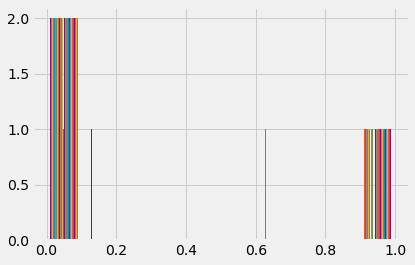

In [60]:
plt.hist(predictions);

### Confusion matrix and Classification report
---

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [63]:
from imblearn.over_sampling import SMOTE
columns = X_train.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  720
Number of no subscription in oversampled data 0
Number of subscription 240
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.3333333333333333


In [64]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
confusion = pd.DataFrame(confusion_matrix,index=['True_Label_0 Low', 'True_Label_1 Medium','True_Label_2 High'],
                         columns=['Predict_Label_0 Low', 'Predict_Label_1 Medium','Predict_Label_2 High'])

confusion

[[ 76   0   0]
 [  4  83   5]
 [  0   0 132]]


,Predict_Label_0 Low,Predict_Label_1 Medium,Predict_Label_2 High
True_Label_0 Low,76,0,0
True_Label_1 Medium,4,83,5
True_Label_2 High,0,0,132


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(LUNG_CANCER.genetic_risk, LUNG_CANCER.level)
print(confusion_matrix)
confusion = pd.DataFrame(confusion_matrix,index=['genetic_risk_level_1', 'genetic_risk_level_2','genetic_risk_level_3','genetic_risk_level_4', 'genetic_risk_level_5','genetic_risk_level_6','genetic_risk_level_7'],
                         columns=['level Low', 'level Medium','level High','Predected_Label_4', 'Predected_Label_5','Predected_Label_6','Predected_Label_7'])

confusion

[[ 40   0   0   0   0   0   0]
 [121  91   0   0   0   0   0]
 [ 92  81   0   0   0   0   0]
 [ 20  20   0   0   0   0   0]
 [  0  20  80   0   0   0   0]
 [ 20  20  68   0   0   0   0]
 [ 10 100 217   0   0   0   0]]


,level Low,level Medium,level High,Predected_Label_4,Predected_Label_5,Predected_Label_6,Predected_Label_7
genetic_risk_level_1,40,0,0,0,0,0,0
genetic_risk_level_2,121,91,0,0,0,0,0
genetic_risk_level_3,92,81,0,0,0,0,0
genetic_risk_level_4,20,20,0,0,0,0,0
genetic_risk_level_5,0,20,80,0,0,0,0
genetic_risk_level_6,20,20,68,0,0,0,0
genetic_risk_level_7,10,100,217,0,0,0,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


## Compute precision, recall, F-measure and support

In [79]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred, digits=3))

             precision    recall  f1-score   support

          1      0.950     1.000     0.974        76
          2      1.000     0.902     0.949        92
          3      0.964     1.000     0.981       132

avg / total      0.971     0.970     0.970       300



Interpretation: Of the entire test set, 97% of patients have level cancer High.

## Lets implement the same logistic regression using scikit learn

---

In [81]:
'''Remeber that 1 is Low, 2 is Medium, 3 is High'''
print (LUNG_CANCER['level'].value_counts(), "\n" )

3    365
2    332
1    303
Name: level, dtype: int64 



In [82]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
from sklearn.metrics import confusion_matrix
y_pred=logistic.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
confusion = pd.DataFrame(confusion_matrix,index=['True_Label_0 Low', 'True_Label_1 Medium','True_Label_2 High'],
                         columns=['Predict_Label_0 Low', 'Predict_Label_1 Medium','Predict_Label_2 High'])

confusion

[[ 76   0   0]
 [  4  83   5]
 [  0   0 132]]


,Predict_Label_0 Low,Predict_Label_1 Medium,Predict_Label_2 High
True_Label_0 Low,76,0,0
True_Label_1 Medium,4,83,5
True_Label_2 High,0,0,132


In [84]:
print (classification_report(y_test, y_pred, digits=3))

             precision    recall  f1-score   support

          1      0.950     1.000     0.974        76
          2      1.000     0.902     0.949        92
          3      0.964     1.000     0.981       132

avg / total      0.971     0.970     0.970       300



Interpretation: Of the entire test set, 97% of patients have level cancer High.

In [86]:
'''Use scikit learn'''
r_d_logistic = LogisticRegression()
r_d_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Calculate accuracy, Misclassification Rate (Error Rate), Precision,  Recall
---

In [87]:
## Accuracy
## How often is the classifier correct?
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print ("Accuracy score: %.3f" %(acc*100))

Accuracy score: 97.000
